<a href="https://colab.research.google.com/github/dhiru-c/Bike-Sharing-Demand-Prediction---Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

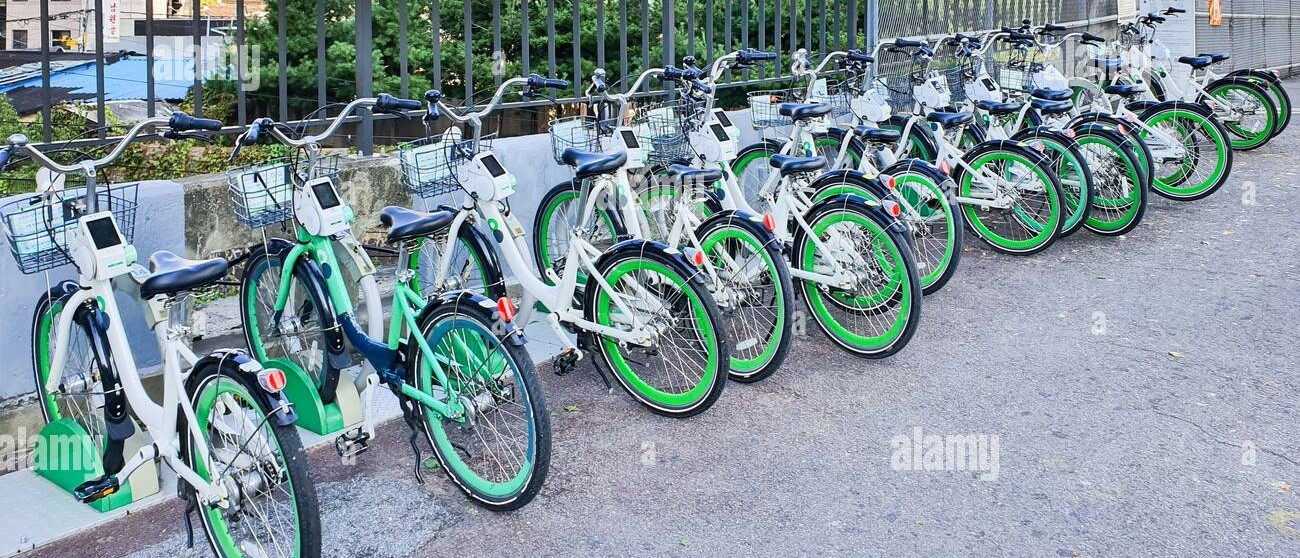

# **Data Preparation**


## **Importing Libraries and the Dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import eli5 as eli

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Defining url of saved csv file
path = 'https://drive.google.com/uc?id=1Tl--fvtuxxdTwY5cBUNnN9y2-EO2OTLc'

# Importing dataset to create a dataframe
df = pd.read_csv(path,encoding = 'latin',parse_dates=['Date'])

## **Inspecting Dataset**

In [ ]:
# Checking shape pf dataframe
df.shape

(8760, 14)

In [ ]:
# Checking top 5 records in dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Checking bottom 5 records in dataframe
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
df.describe(include='all',percentiles=[.01,.25,.5,.75,.99])

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,2017-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
first,2017-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-12-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
1%,NaN,0.000000,0.000000,-12.741000,17.000000,0.100000,173.000000,-24.800000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
#checking null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#Check all the coloumns present in our dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

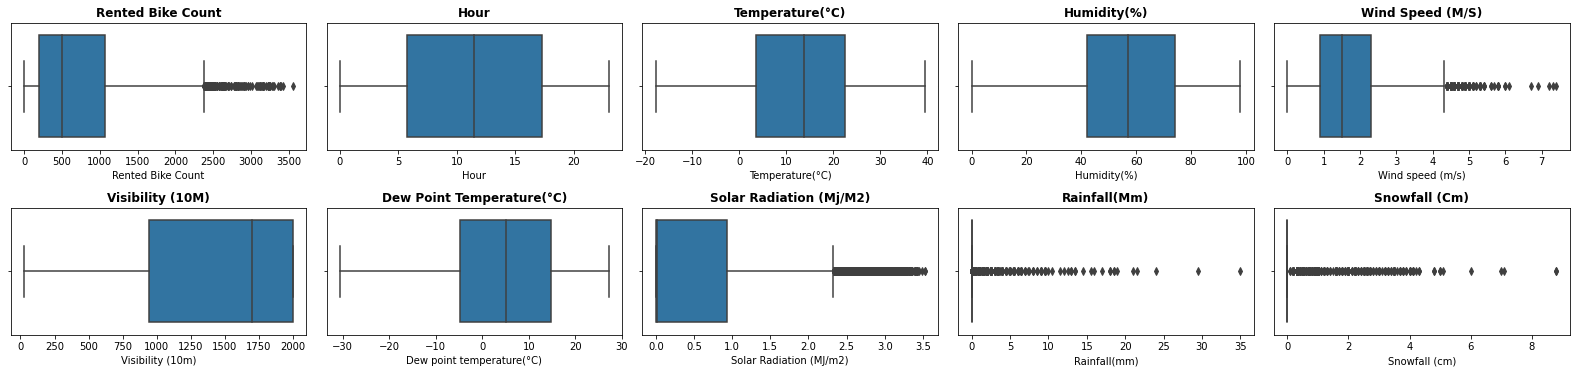

In [ ]:
# Visualization is the easiest way to have an inference about the overall data and the outliers.
plt.figure(figsize=(22,10))
for n,column in enumerate(df.describe().columns):
  plt.subplot(4, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##**Cleaning and Manipulating dataset**

In [ ]:
#checking duplicates
len(df[df.duplicated()])

0

In [ ]:
#extracting date from date column
df['Date']=pd.to_datetime(df['Date'])
df['year']=pd.DatetimeIndex(df['Date']).year
df['month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.DatetimeIndex(df['Date']).day

df['month_name']=df['Date'].dt.month_name()
df['day_name']=df['Date'].dt.day_name()

df.drop(['Date'],axis=1,inplace=True)

In [ ]:
#new column having day or night
df['day_or_night']=df['Hour'].apply(lambda x: 'day' if (20 > x >5) else 'night')

In [ ]:
df.drop(['month','day'],axis=1,inplace=True)

## **EDA**

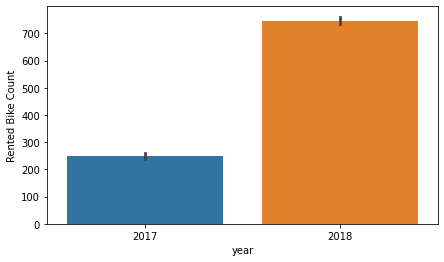

In [ ]:
#checking year wise demand
plt.figure(figsize=(7,4))
sns.barplot(x=df['year'],y=df['Rented Bike Count'])

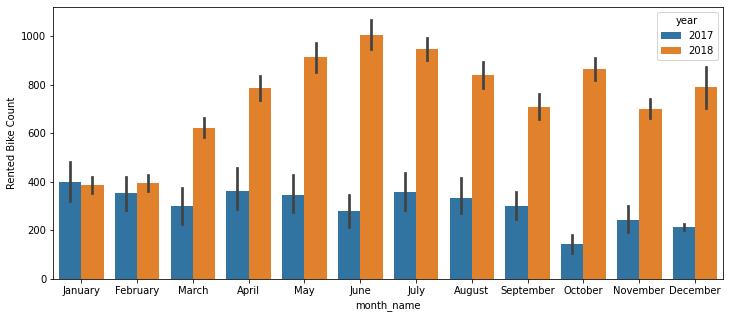

In [ ]:
# checking month wise demand
plt.figure(figsize=(12,5))
sns.barplot(x=df['month_name'],y=df['Rented Bike Count'],hue='year',data=df)


In [ ]:
# Checking unique value with their counts in categorical features
for col in ['Seasons', 'Holiday', 'Functioning Day']:
  print(df[col].value_counts(),'\n')

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Yes    8465
No      295
Name: Functioning Day, dtype: int64 



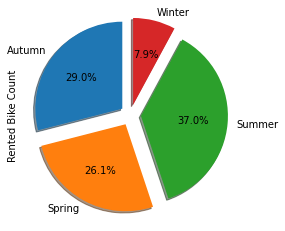

In [ ]:
#checking bike counts on basis of season
explode = (0.12,0.12,0.12,0.12)
df.groupby(['Seasons'])['Rented Bike Count'].sum().plot.pie( explode=explode, autopct='%1.1f%%',shadow=True, startangle=90)

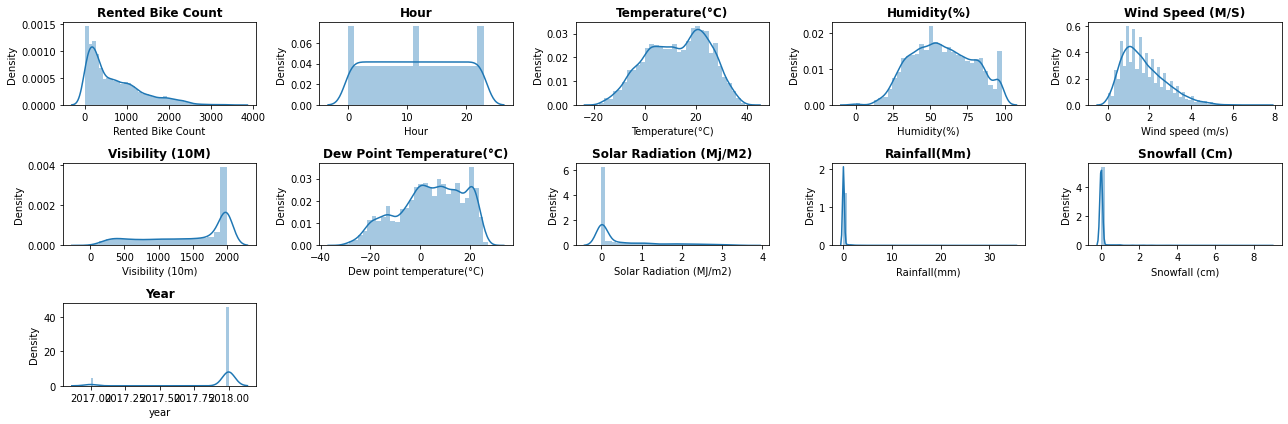

In [ ]:
# Plotting the distplots for each  variable
plt.figure(figsize=(18,6))
for n,column in enumerate(df.describe().columns):
  plt.subplot(3,5,n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

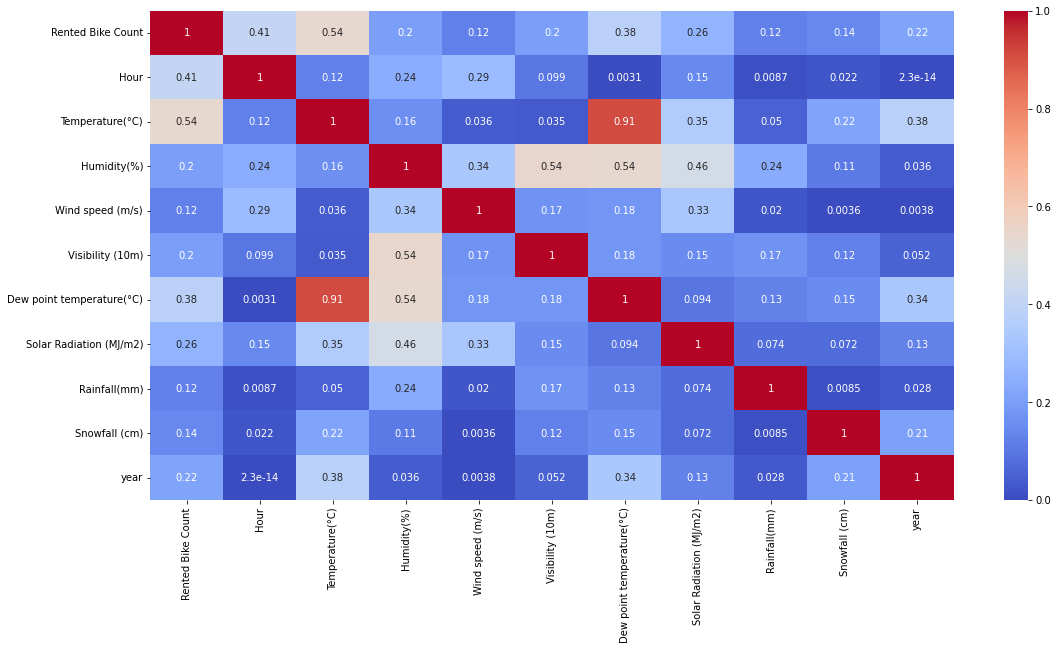

In [ ]:
#checking corelations
plt.figure(figsize=(18,9))
sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')

In [ ]:
#to drop the Dew point temperature(°C) column
df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)


In [ ]:
corr_df=df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'].reset_index()
corr_df.columns=['varibles','correlation']
corr_df

,varibles,correlation
0,Rented Bike Count,1.000000
1,Temperature(°C),0.538558
2,Hour,0.410257
3,Solar Radiation (MJ/m2),0.261837
4,year,0.215162
5,Visibility (10m),0.199280
6,Wind speed (m/s),0.121108
7,Rainfall(mm),-0.123074
8,Snowfall (cm),-0.141804
9,Humidity(%),-0.199780


In [ ]:
#making copy of original df 
bike_df = df.copy()

## **Model prepration**

In [ ]:
# Label Encoding
df = df.replace({'Holiday':{'Holiday':1, 'No Holiday':0},'Functioning Day':{'Yes':1, 'No': 0},'day_or_night':{'day':1, 'night': 0}})

# One Hot Encoding
df = pd.get_dummies(df, columns=['Seasons','month_name'], prefix='', prefix_sep='')

df.drop(['day_name'],axis=1,inplace=True)

In [ ]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,day_or_night,Autumn,Spring,Summer,Winter,April,August,December,February,January,July,June,March,May,November,October,September
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,2017,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,2017,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,2017,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,2017,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,2017,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,0,1,2018,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,0,1,2018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,0,1,2018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,0,1,2018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#dependend or labels
dependend_variable = 'Rented Bike Count'
#list of features
independend_variable = list(set(df.describe(include='all').columns.tolist()) - {dependend_variable})
print(independend_variable)

['May', 'Snowfall (cm)', 'February', 'March', 'Winter', 'Visibility (10m)', 'Rainfall(mm)', 'December', 'September', 'Summer', 'Wind speed (m/s)', 'year', 'Solar Radiation (MJ/m2)', 'Autumn', 'Spring', 'Hour', 'day_or_night', 'Temperature(°C)', 'Humidity(%)', 'Holiday', 'Functioning Day', 'April', 'November', 'August', 'June', 'July', 'January', 'October']


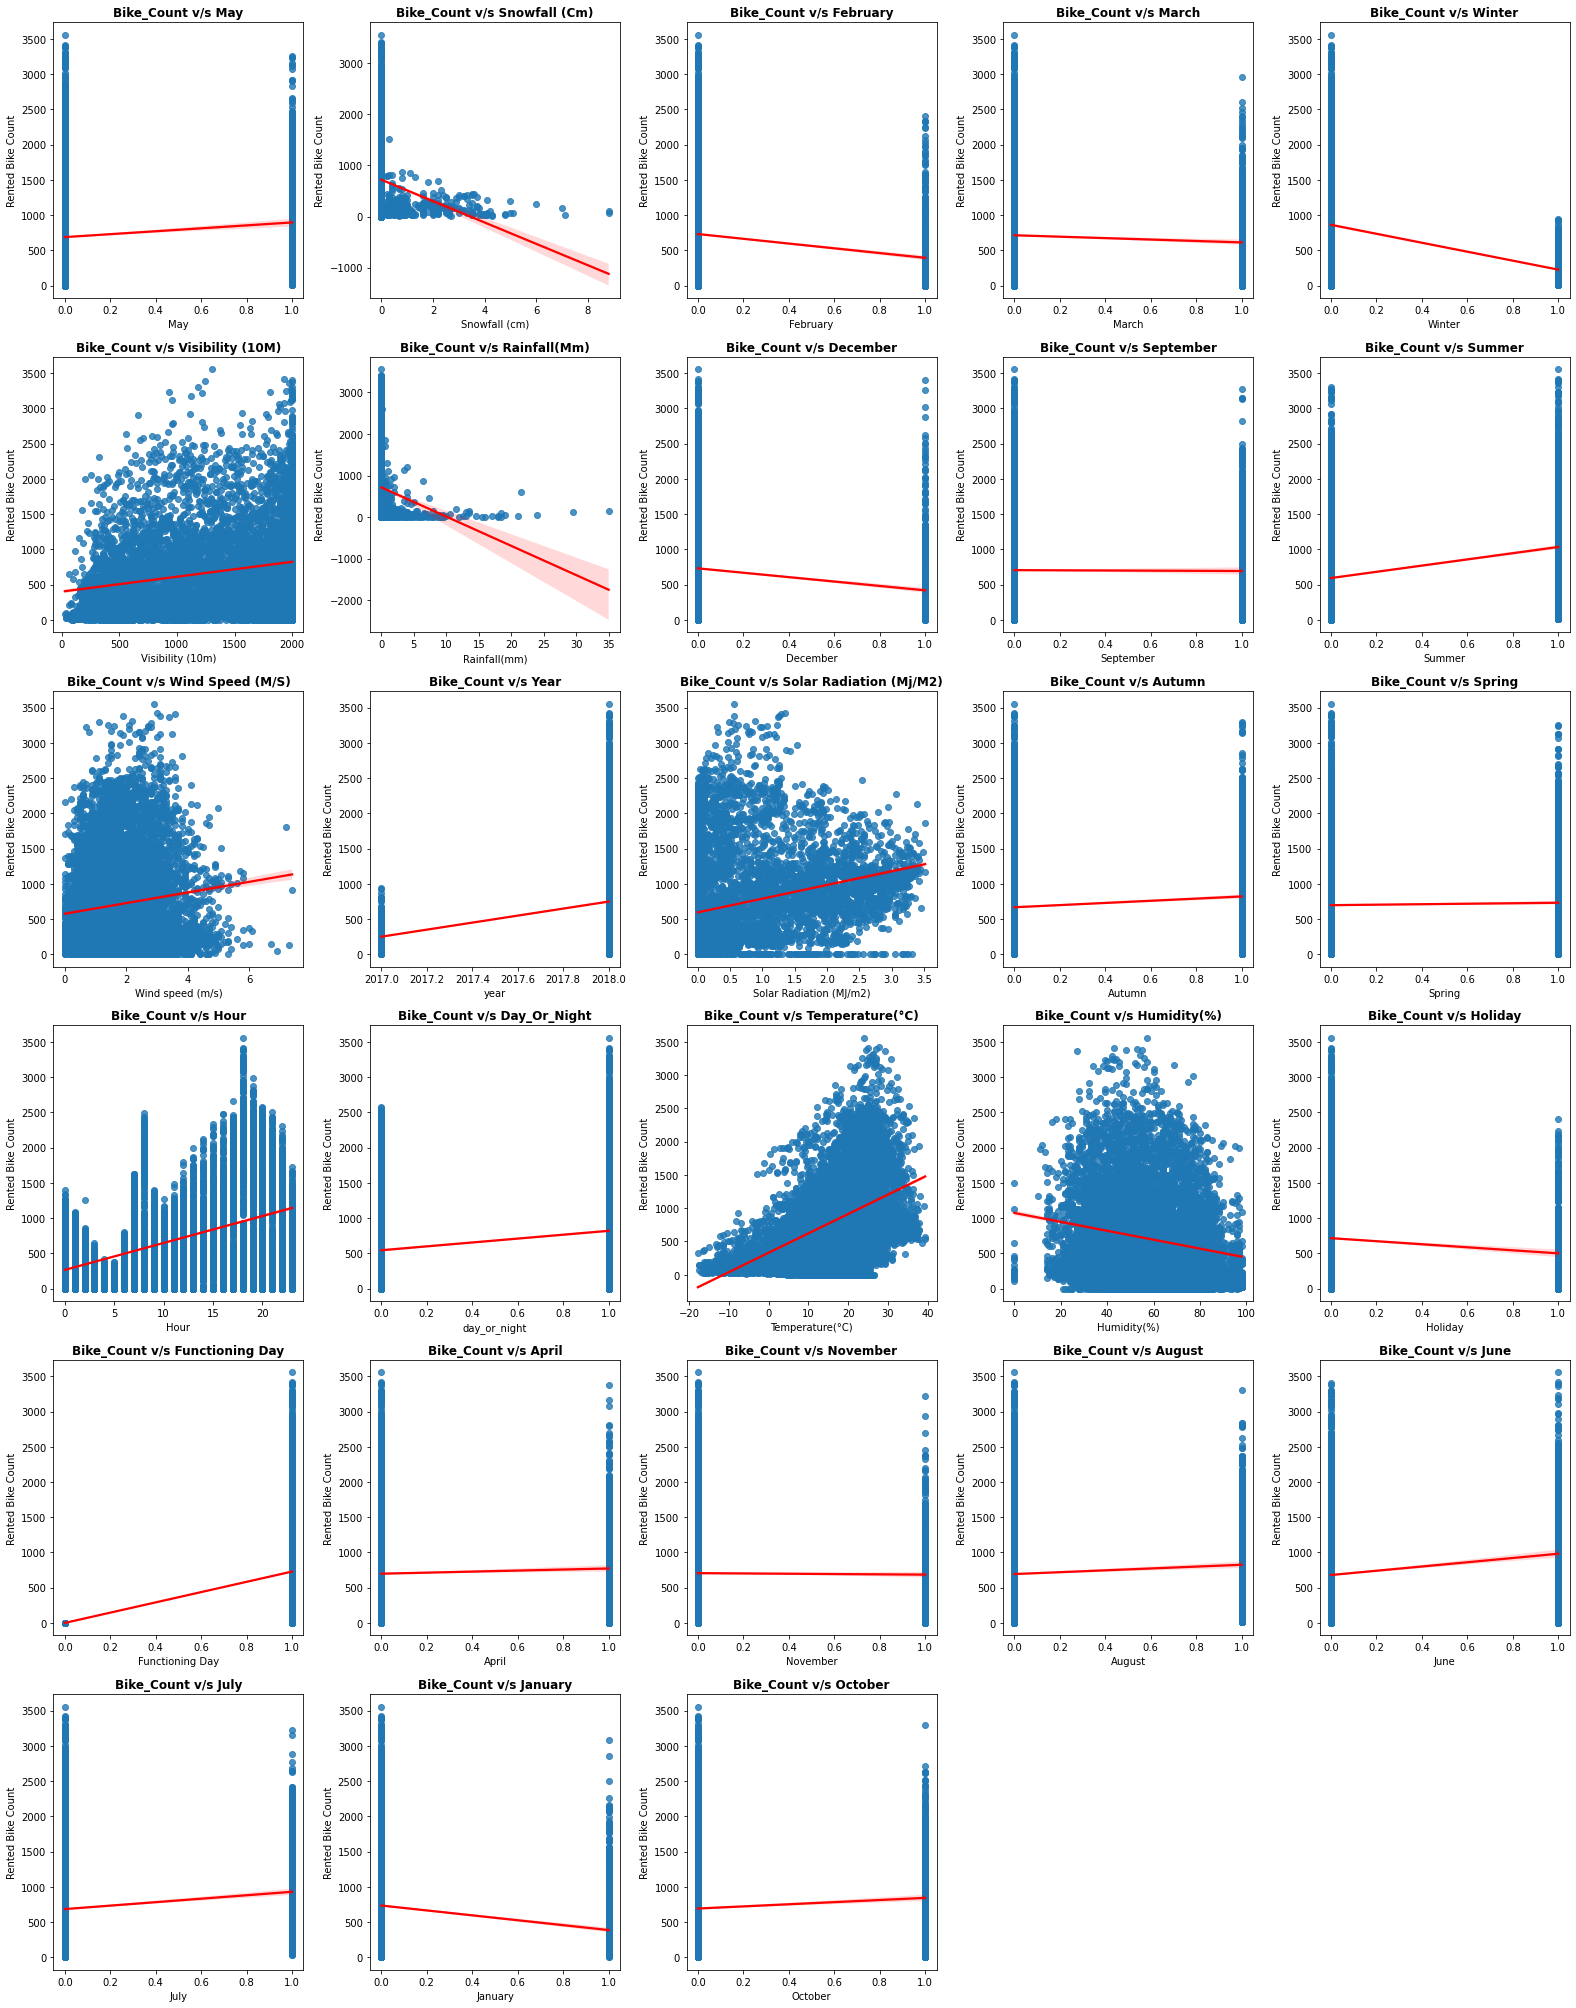

In [ ]:
# Checking Linearity
plt.figure(figsize=(22,28))
for n,column in enumerate(independend_variable):
  plt.subplot(6,5 , n+1)
  sns.regplot(data = df, x = column, y ='Rented Bike Count',line_kws={"color": "red"})
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
#checking skewness of the dependend variable
print(f'skewness of original data :{df[dependend_variable].skew()}')
l_og= np.log(df['Rented Bike Count']).skew()
print(f'skewness after applying log transformation : { l_og}')
sq_rt=np.sqrt(df['Rented Bike Count']).skew()
print(f'skewness after applying sqrt transformation : {sq_rt}')
print('_ * _ *'*10)
print("since ''sqrt transformation''  gives value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical we will use it")

skewness of original data :1.1534281773679014
skewness after applying log transformation : nan
skewness after applying sqrt transformation : 0.237362090985412
_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *
since ''sqrt transformation''  gives value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical we will use it


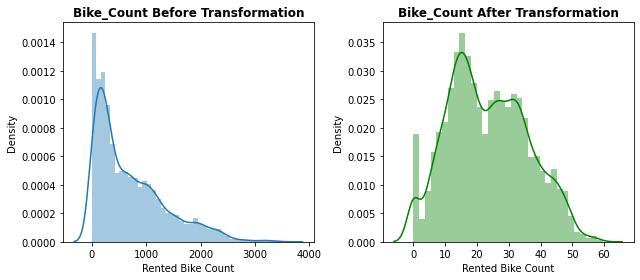

In [ ]:
#plot for distribution of dependend variable after applying the sqrt transformation
plt.figure(figsize=(9,4))
plot = plt.subplot(1,2,1)
sns.distplot(df['Rented Bike Count']).set_title('Bike_Count Before Transformation',weight='bold')
plot = plt.subplot(1,2,2)
sns.distplot(np.sqrt(df['Rented Bike Count']),color= 'g').set_title('Bike_Count After Transformation',weight='bold')
plt.tight_layout()

In [ ]:
# #spliting dataset into training and test set
training_df,testing_df = train_test_split(df,train_size = 0.7, test_size = 0.3,random_state=42)

In [ ]:
#transforming the dataset
col_to_scale=['Wind speed (m/s)','Hour','Snowfall (cm)','Humidity(%)','Temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Visibility (10m)']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
training_df[col_to_scale] = scaler.fit_transform(training_df[col_to_scale])
testing_df[col_to_scale]  = scaler.transform(testing_df[col_to_scale])

training_df['Rented Bike Count'] = np.sqrt(training_df[dependend_variable])
testing_df['Rented Bike Count']  = np.sqrt(testing_df[dependend_variable])

x_train = training_df.drop(['Rented Bike Count'],axis=1)
y_train = training_df['Rented Bike Count']
x_test  = testing_df.drop(['Rented Bike Count'],axis=1)
y_test  = testing_df['Rented Bike Count']


##**Removing Multicolinearity**

In [ ]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. VIF score of an independent variable represents how well the variable is explained by other independent variables.

##**RFE Algorithm for Feature Selection**

In [ ]:
from sklearn.feature_selection import RFE
regressor = LinearRegression()
rfe       = RFE(regressor,n_features_to_select=13)
rfe.fit(x_train, y_train)
y_predd = rfe.predict(x_train)

In [ ]:
final = x_train.columns[rfe.support_]
final

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Holiday', 'Functioning Day', 'year', 'day_or_night',
       'Autumn', 'Winter', 'June', 'October'],
      dtype='object')

In [ ]:
#features that and not giveing more contribution in predicting dependend variable
feature_not_use = x_train.columns[~rfe.support_]
feature_not_use

Index(['Wind speed (m/s)', 'Visibility (10m)', 'Snowfall (cm)', 'Spring',
       'Summer', 'April', 'August', 'December', 'February', 'January', 'July',
       'March', 'May', 'November', 'September'],
      dtype='object')

In [ ]:
rfe_x_train = x_train[final]

In [ ]:
import statsmodels.api as lm
rfe_x_train = lm.add_constant(rfe_x_train)
sm          = lm.OLS(y_train,rfe_x_train).fit()

print(sm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1003.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:08:36   Log-Likelihood:                -20690.
No. Observations:                6132   AIC:                         4.141e+04
Df Residuals:                    6118   BIC:                         4.150e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

In [ ]:
rfe_x_train.drop(['const'],axis=1, inplace=True)

In [ ]:
#checking VIF
calc_vif(rfe_x_train)

,variables,VIF
0,year,76.273568
1,Functioning Day,31.706003
2,Temperature(°C),21.700775
3,Humidity(%),15.751763
4,Hour,4.297109
5,Winter,3.749880
6,day_or_night,3.671359
7,Solar Radiation (MJ/m2),3.237386
8,Autumn,1.946713
9,October,1.255193


In [ ]:
#droping year col 
rfe_x_train.drop(['year'],axis=1,inplace=True)

In [ ]:
#checking VIF after droping year
calc_vif(rfe_x_train)

,variables,VIF
0,Functioning Day,17.668398
1,Temperature(°C),17.303468
2,Humidity(%),12.558020
3,Hour,4.137512
4,day_or_night,3.660643
5,Solar Radiation (MJ/m2),3.189065
6,Winter,2.750456
7,Autumn,1.633961
8,October,1.254232
9,June,1.146266


In [ ]:
#droping Functioning Day col
rfe_x_train.drop(['Functioning Day'] , axis=1 , inplace=True)

In [ ]:
#checking VIF after droping Functioning Day
calc_vif(rfe_x_train)

,variables,VIF
0,Temperature(°C),14.166341
1,Humidity(%),10.224652
2,Hour,4.008463
3,day_or_night,3.639730
4,Solar Radiation (MJ/m2),3.169130
5,Winter,1.986657
6,Autumn,1.633449
7,October,1.243901
8,June,1.143074
9,Rainfall(mm),1.086979


In [ ]:
#droping Temperature Day col
rfe_x_train.drop(['Temperature(°C)'] , axis=1 , inplace=True)

In [ ]:
#checking VIF after droping Functioning Day
calc_vif(rfe_x_train)

,variables,VIF
0,day_or_night,3.638494
1,Hour,3.234108
2,Humidity(%),3.220774
3,Solar Radiation (MJ/m2),2.325253
4,Autumn,1.631092
5,Winter,1.459970
6,October,1.237498
7,June,1.139283
8,Holiday,1.072999
9,Rainfall(mm),1.071098


In [ ]:
#fitting to ordinary list square (OLs)
final_x_traindf = lm.add_constant(rfe_x_train)
sm = lm.OLS(y_train,final_x_traindf).fit()

print(sm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     498.3
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:08:37   Log-Likelihood:                -22364.
No. Observations:                6132   AIC:                         4.475e+04
Df Residuals:                    6121   BIC:                         4.482e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
final_x_traindf.drop(['const'],axis=1,inplace = True)

# **Applying Models**

In [ ]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train=None, X_test=None, y_train=None, y_test=None):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  a,p = y_test**2,y_pred**2

  # Printing Evaluation Matrix
  print("MSE :" , mean_squared_error(a,p))
  print("RMSE :" ,np.sqrt(mean_squared_error(a,p)))
  print("MAE :" ,mean_absolute_error(a,p))
  print("Train R2 :", r2_score(y_train**2,model.predict(X_train)**2))
  print("Test R2 :" ,r2_score(a,p))
  print("Adjusted R2 : ", 1-(1-r2_score(a,p))*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))
  

  # Plotting actual and predicted values
  plt.figure(figsize=(18,4))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

  #checking most imp features in predicting dependend variable 
  features = X_train.columns
  importances = model.feature_importances_
  indices = np.argsort(importances)

  #ploting global explainability
  plt.figure(figsize=(10,15))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

  return model

##**Linear Regression**

In [ ]:
x_test_df= x_test[final_x_traindf.columns]

MSE : 229343.54143556816
RMSE : 478.89825791661445
MAE : 333.76220915429946
Train R2 : 0.4468690433240645
Test R2 : 0.440338998153759
Adjusted R2 :  0.4382004387275219


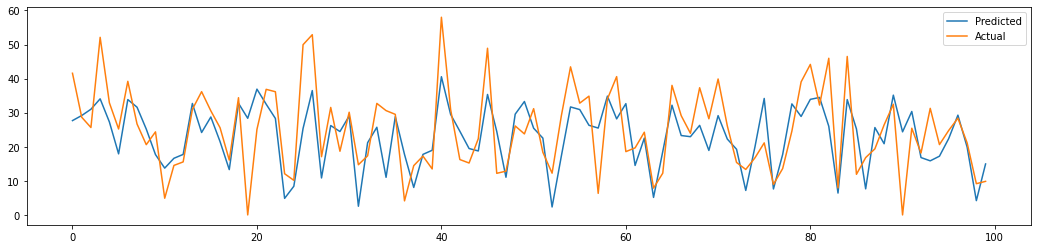

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fitting the model
regressor.fit(final_x_traindf,y_train)
y_pred = regressor.predict(x_test_df)
T,R = y_test**2,y_pred**2
  
  

# Printing Evaluation Matrix
print("MSE :" , mean_squared_error(T,R))
print("RMSE :" ,np.sqrt(mean_squared_error(T,R)))
print("MAE :" ,mean_absolute_error(T,R))
print("Train R2 :", r2_score(y_train**2,regressor.predict(final_x_traindf)**2))
print("Test R2 :" ,r2_score(T,R))
print("Adjusted R2 : ", 1-(1-r2_score(T,R))*((len(x_test_df)-1)/(len(x_test_df)-x_test_df.shape[1]-1)))
  

# Plotting actual and predicted values
plt.figure(figsize=(18,4))
plt.plot((y_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

##**Decision Tree**

In [ ]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month_name,day_name,day_or_night
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday,night
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday,night
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday,night
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday,night
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday,night


In [ ]:
feature1= pd.get_dummies(bike_df['Seasons'], drop_first=True)
feature2 = pd.get_dummies(bike_df['Holiday'], drop_first=True)
feature3 = pd.get_dummies(bike_df['Functioning Day'], drop_first=True)
feature4 = pd.get_dummies(bike_df['day_name'], drop_first=True)
feature5 = pd.get_dummies(bike_df['month_name'], drop_first=True)
feature6 = pd.get_dummies(bike_df['day_or_night'], drop_first=True)

In [ ]:
#joining two dataframes
rf_bike_df = pd.concat([bike_df, feature1, feature2, feature3, feature4, feature5, feature6] , axis =1)

In [ ]:
#droping columns for which we made dummy variables
rf_bike_df.drop(['Seasons','Holiday','Functioning Day','day_name','month_name','day_or_night'] , axis=1,inplace=True)

In [ ]:
#dependent variable
label='Rented Bike Count'
#extracting features
features = list(set(rf_bike_df.columns.tolist())  - {label})
print(features)

['Snowfall (cm)', 'February', 'March', 'Yes', 'Rainfall(mm)', 'December', 'Solar Radiation (MJ/m2)', 'Spring', 'night', 'Temperature(°C)', 'Humidity(%)', 'November', 'June', 'July', 'October', 'May', 'Winter', 'Visibility (10m)', 'September', 'Summer', 'Monday', 'Wind speed (m/s)', 'year', 'Tuesday', 'No Holiday', 'Hour', 'August', 'Thursday', 'Saturday', 'Wednesday', 'January', 'Sunday']


In [ ]:
#create the data of dependent variables 
x= rf_bike_df[features]
#create the data of independent variables 
y= np.sqrt(rf_bike_df[label])

In [ ]:
#spliting data into train test 
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.2 ,random_state=0)

MSE : 69985.07819634704
RMSE : 264.5469300452134
MAE : 153.31449771689498
Train R2 : 1.0
Test R2 : 0.8327806428446106
Adjusted R2 :  0.829667775230316


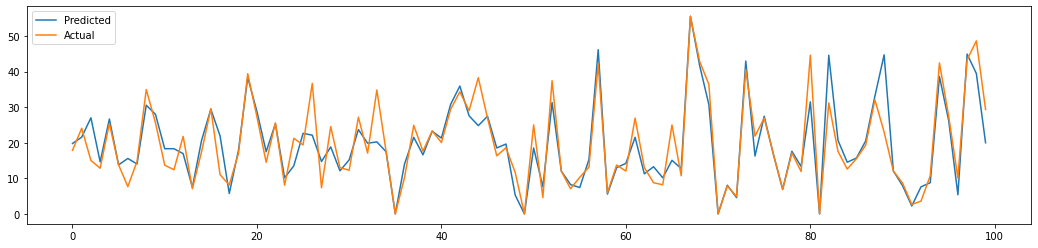

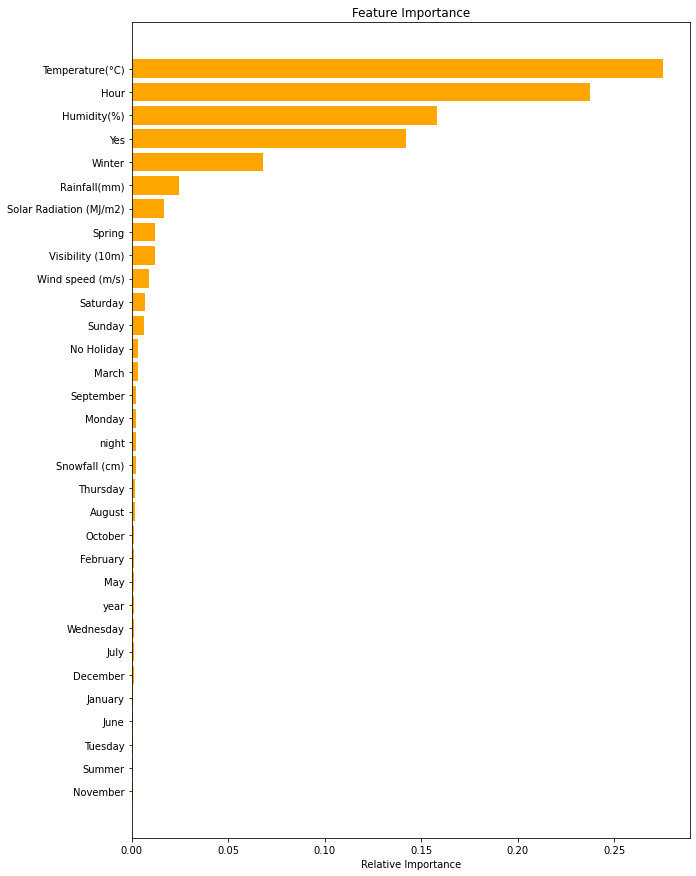

DecisionTreeRegressor()

In [ ]:
#appling Decision Tree algorithm
dt_regressor = DecisionTreeRegressor()
analyse_model(dt_regressor, X_train=xtrain, X_test=xtest, y_train=ytrain, y_test=ytest)

## **Random Forest Regressor**




In [ ]:
# Cross validation to get best parameters
Reg          = RandomForestRegressor(n_estimators=100)
parameters   = {'max_depth': [i for i in range(20)]}
rf_regressor = GridSearchCV(Reg, parameters, scoring='neg_mean_squared_error', cv=5)
rf_regressor .fit(xtrain, ytrain).best_params_

{'max_depth': 19}

MSE : 42945.971765399445
RMSE : 207.2340989446463
MAE : 122.58254939406135
Train R2 : 0.9833484005669991
Test R2 : 0.8973867290556454
Adjusted R2 :  0.8954765343667452


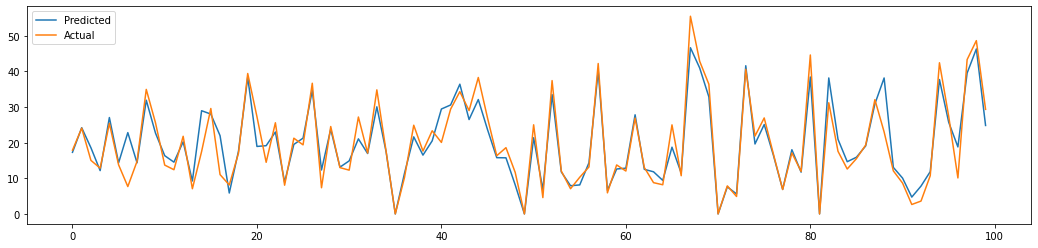

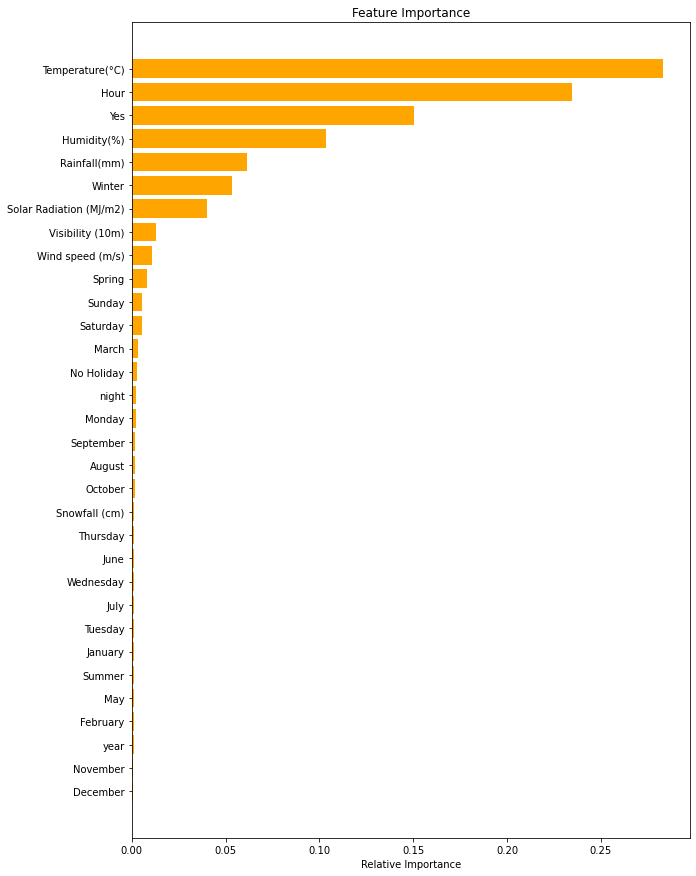

RandomForestRegressor(max_depth=19)

In [ ]:
#appling Random Forest algorithm using best parameters
rf_regressor = RandomForestRegressor(n_estimators=100,max_depth=19)
analyse_model(rf_regressor, X_train=xtrain, X_test=xtest, y_train=ytrain, y_test=ytest)

In [ ]:
# Weights for Random Forest
import eli5 as eli
eli.explain_weights(rf_regressor)

Weight,Feature
0.2832 ± 0.0218,x9
0.2347 ± 0.0434,x25
0.1506 ± 0.0229,x3
0.1036 ± 0.0792,x10
0.0613 ± 0.0631,x4
0.0534 ± 0.0313,x16
0.0404 ± 0.0417,x6
0.0130 ± 0.0041,x17
0.0109 ± 0.0031,x21
0.0080 ± 0.0031,x7


##**XGBoost Regressor**

In [ ]:
# Cross validation to get best parameters
model         = XGBRegressor()
parameters    = {'n_estimators': [100,120],'max_depth': [i for i in range(20)],'eta':[0.3,0.2,0.1]}  
xgb_regressor = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
xgb_regressor.fit(xtrain,ytrain).best_params_

[10:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:11:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:11:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:11:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:11:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'eta': 0.3, 'max_depth': 9, 'n_estimators': 120}

[10:36:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE : 33878.93632041861
RMSE : 184.06231640512027
MAE : 104.2569889947876
Train R2 : 0.994623963333129
Test R2 : 0.9190511163434768
Adjusted R2 :  0.9175442144953042


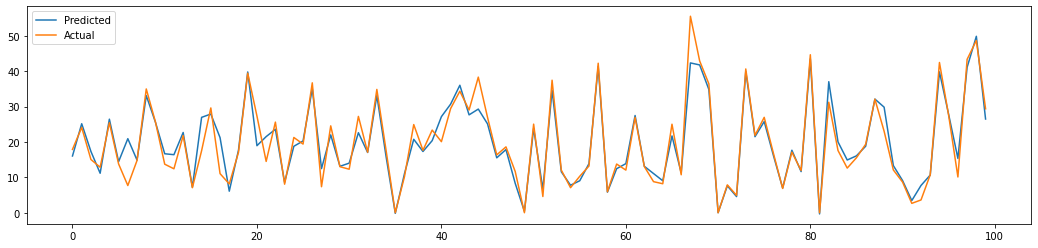

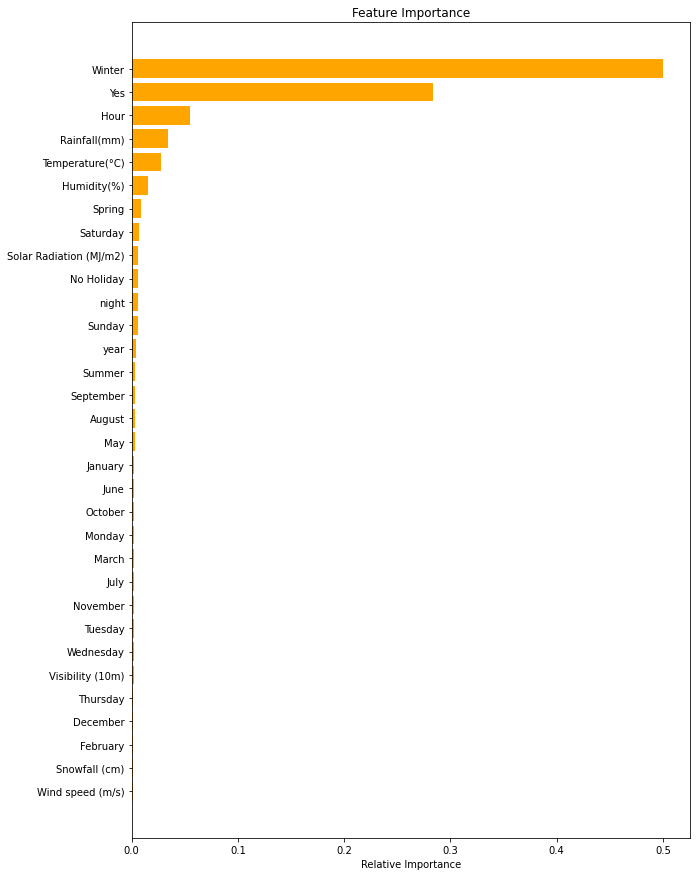

XGBRegressor(eta=0.3, max_depth=10, n_estimators=120)

In [ ]:
#appling XGBoost  algorithm using best parameters
xgb_regressor = XGBRegressor(n_estimators=120,max_depth=10,eta= 0.3)
analyse_model(xgb_regressor, X_train=xtrain, X_test=xtest, y_train=ytrain, y_test=ytest)

##**Gradient Boosting Regressor**

In [ ]:
# Cross validation to get best parameters
gbr_model = GradientBoostingRegressor()
parameters = {'n_estimators':[100,120], 'max_depth': [6,7,8,9,10,11]}
gbr_regressor = GridSearchCV(model, parameters, scoring='neg_mean_squared_error')
gbr_regressor.fit(xtrain,ytrain).best_params_

[10:36:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'max_depth': 9, 'n_estimators': 120}

MSE : 35374.37038871223
RMSE : 188.0807549663501
MAE : 104.74069142347668
Train R2 : 0.9963955249902957
Test R2 : 0.9154779900426566
Adjusted R2 :  0.9139045727543291


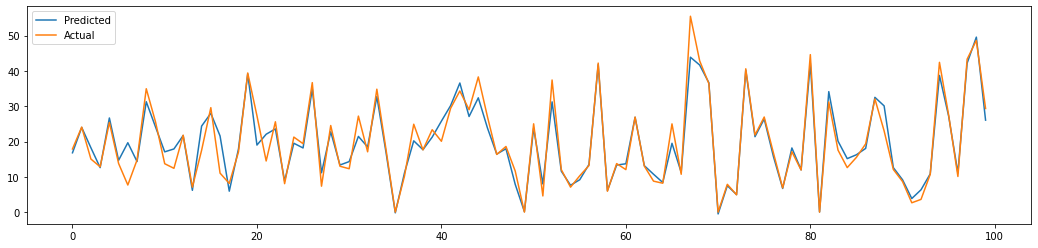

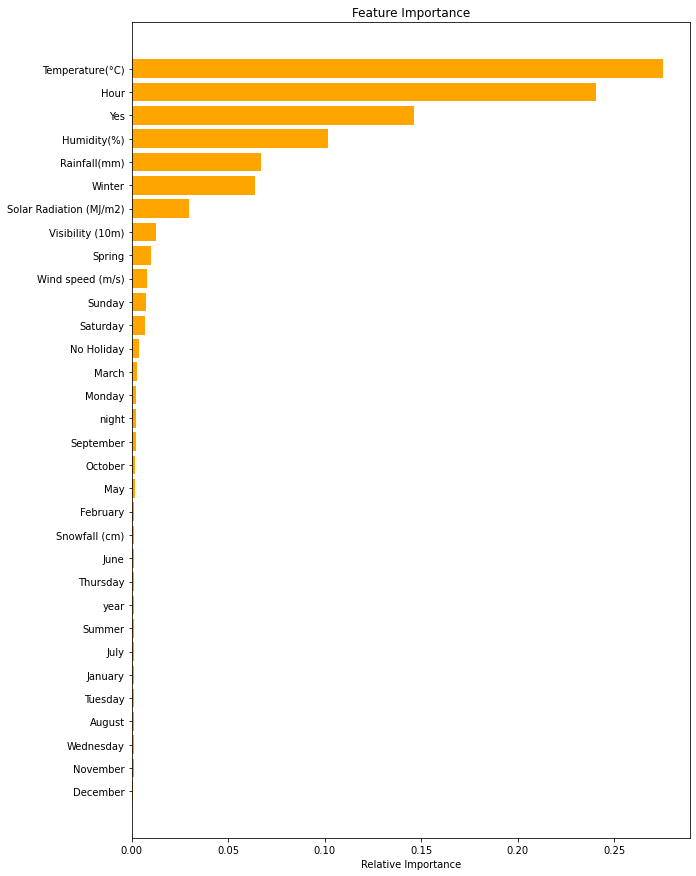

GradientBoostingRegressor(max_depth=10, n_estimators=120)

In [ ]:
#appling Gradient Boosting algorithm using best parameters
gbr_regressor =  GradientBoostingRegressor(n_estimators=120,max_depth=10)
analyse_model(gbr_regressor, X_train=xtrain, X_test=xtest, y_train=ytrain, y_test=ytest)